Confidence Interval

In [2]:
# Import necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Plot styles
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
np.random.seed(15)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

In [4]:

# Convert the population into a pandas dataframe pop_ages
pop_ages = pd.DataFrame(population_ages, columns=['age'])

# Calculate and print descriptive statistics for pop_ages
print(pop_ages.describe())



                 age
count  250000.000000
mean       42.985332
std        13.211628
min        18.000000
25%        29.000000
50%        47.000000
75%        54.000000
max        84.000000


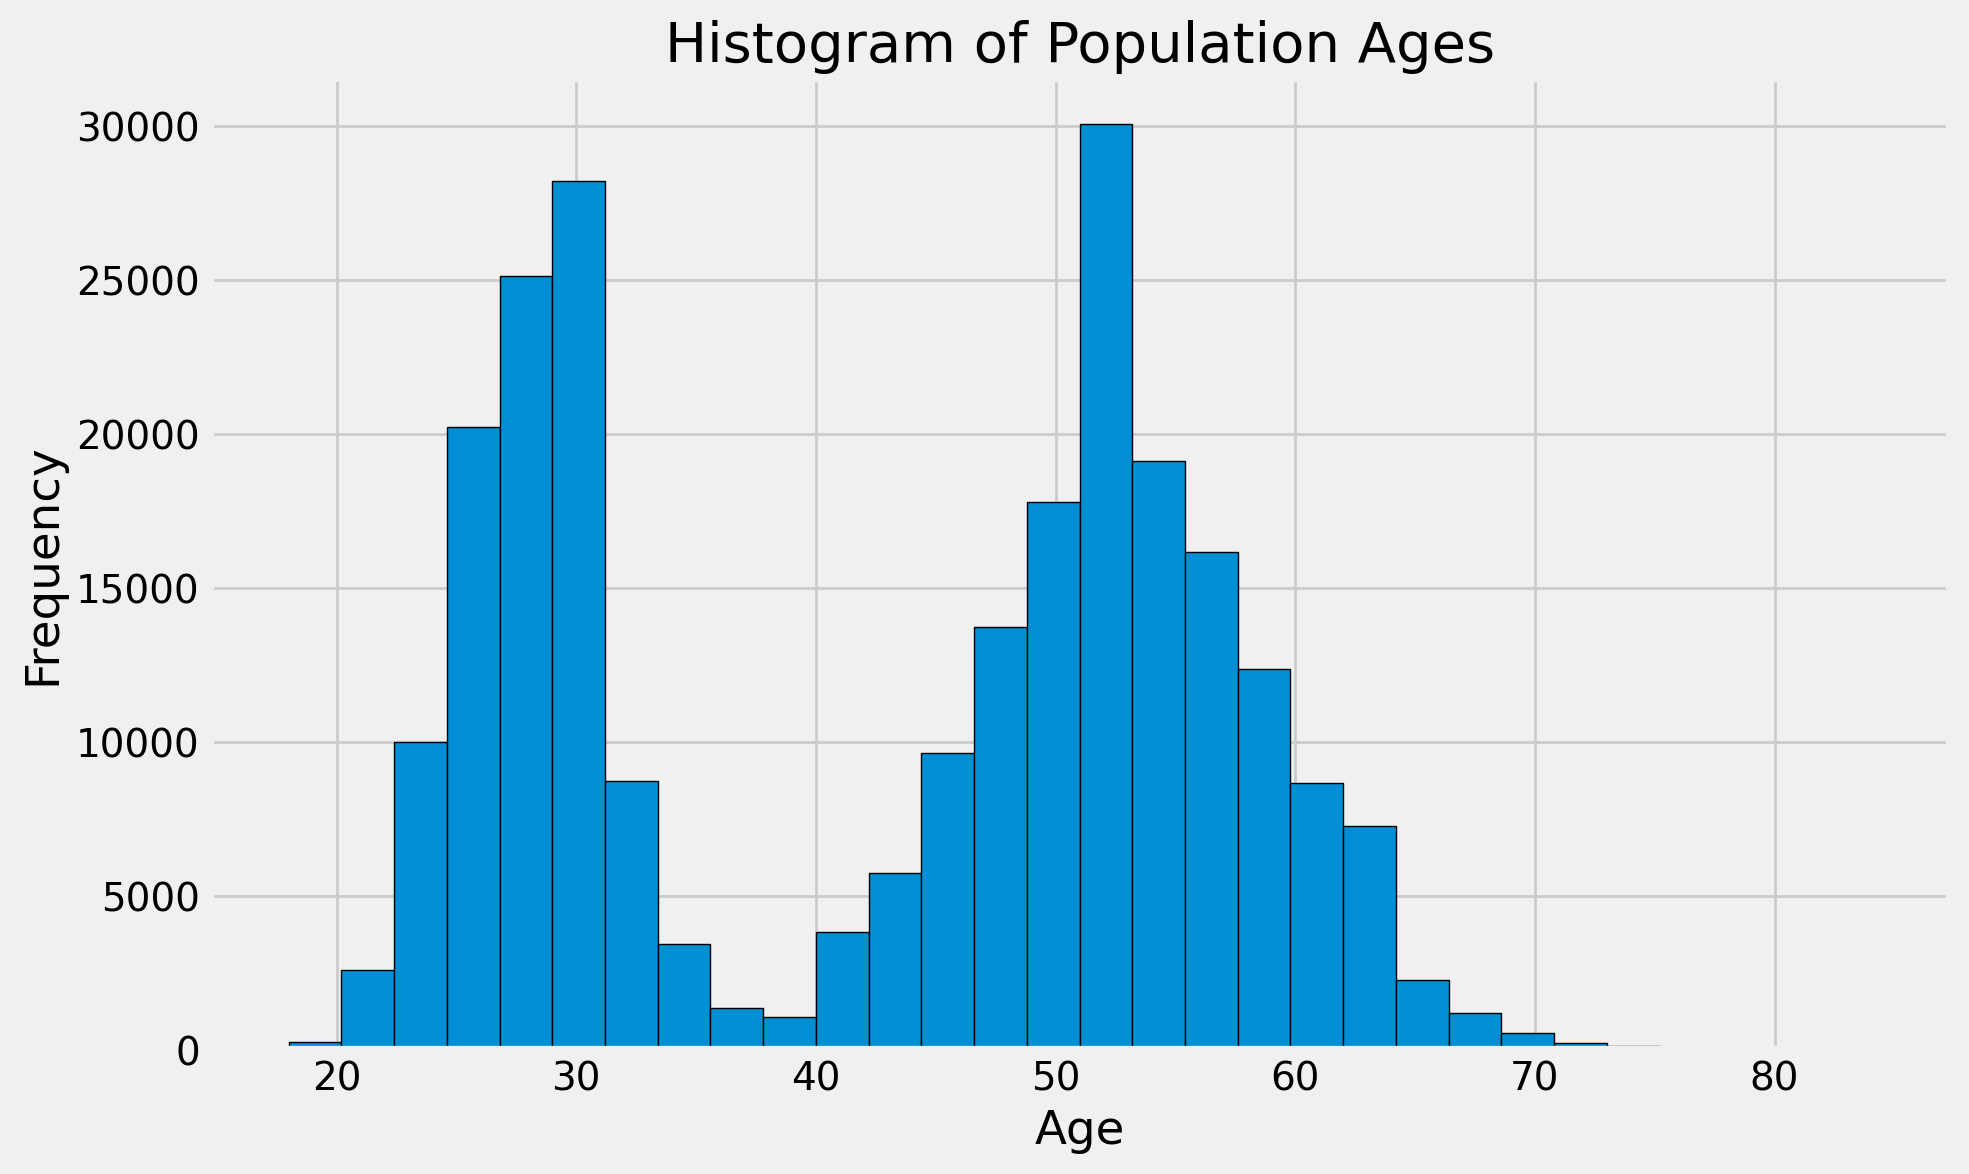

In [5]:
# Draw a histogram for pop ages
plt.figure(figsize=(10,6))
plt.hist(pop_ages['age'], bins=30, edgecolor='black')
plt.title('Histogram of Population Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [6]:
np.random.seed(15)

# Take random sample of size 500
sample_size = 500
sample = np.random.choice(pop_ages["age"], sample_size, replace=False)

# Calculate sample mean and standard deviation
sample_mean = sample.mean()
sample_std = sample.std()

print ("Sample mean:", sample_mean)
print ("Sample std.:", sample_std)
print ("Difference between means:", population_ages.mean() - sample_mean)

# Sample mean: 43.49 
# Sample std.: 12.98529552994463
# Difference between means: -0.5046680000000023

Sample mean: 43.32
Sample std.: 13.313511933370547
Difference between means: -0.33466800000000063


In [10]:
sample_size = 500
np.random.seed(15)

point_estimates = []         # Make empty list to hold point estimates

# Take 100 samples and generate 100 point estimates using a for loop.
for _ in range(100):
    sample = np.random.choice(population_ages, sample_size, replace=False)
    # append sample means to get point estimates
    point_estimates.append(sample.mean())


# Convert the point_estimates into a pandas dataframe
point_estimates_df = pd.DataFrame(point_estimates, columns=["point_estimate"])

# Calculate and print descriptive statistics for the dataframe
print(point_estimates_df.describe())


       point_estimate
count      100.000000
mean        43.066640
std          0.605837
min         41.794000
25%         42.596000
50%         43.094000
75%         43.400000
max         44.384000


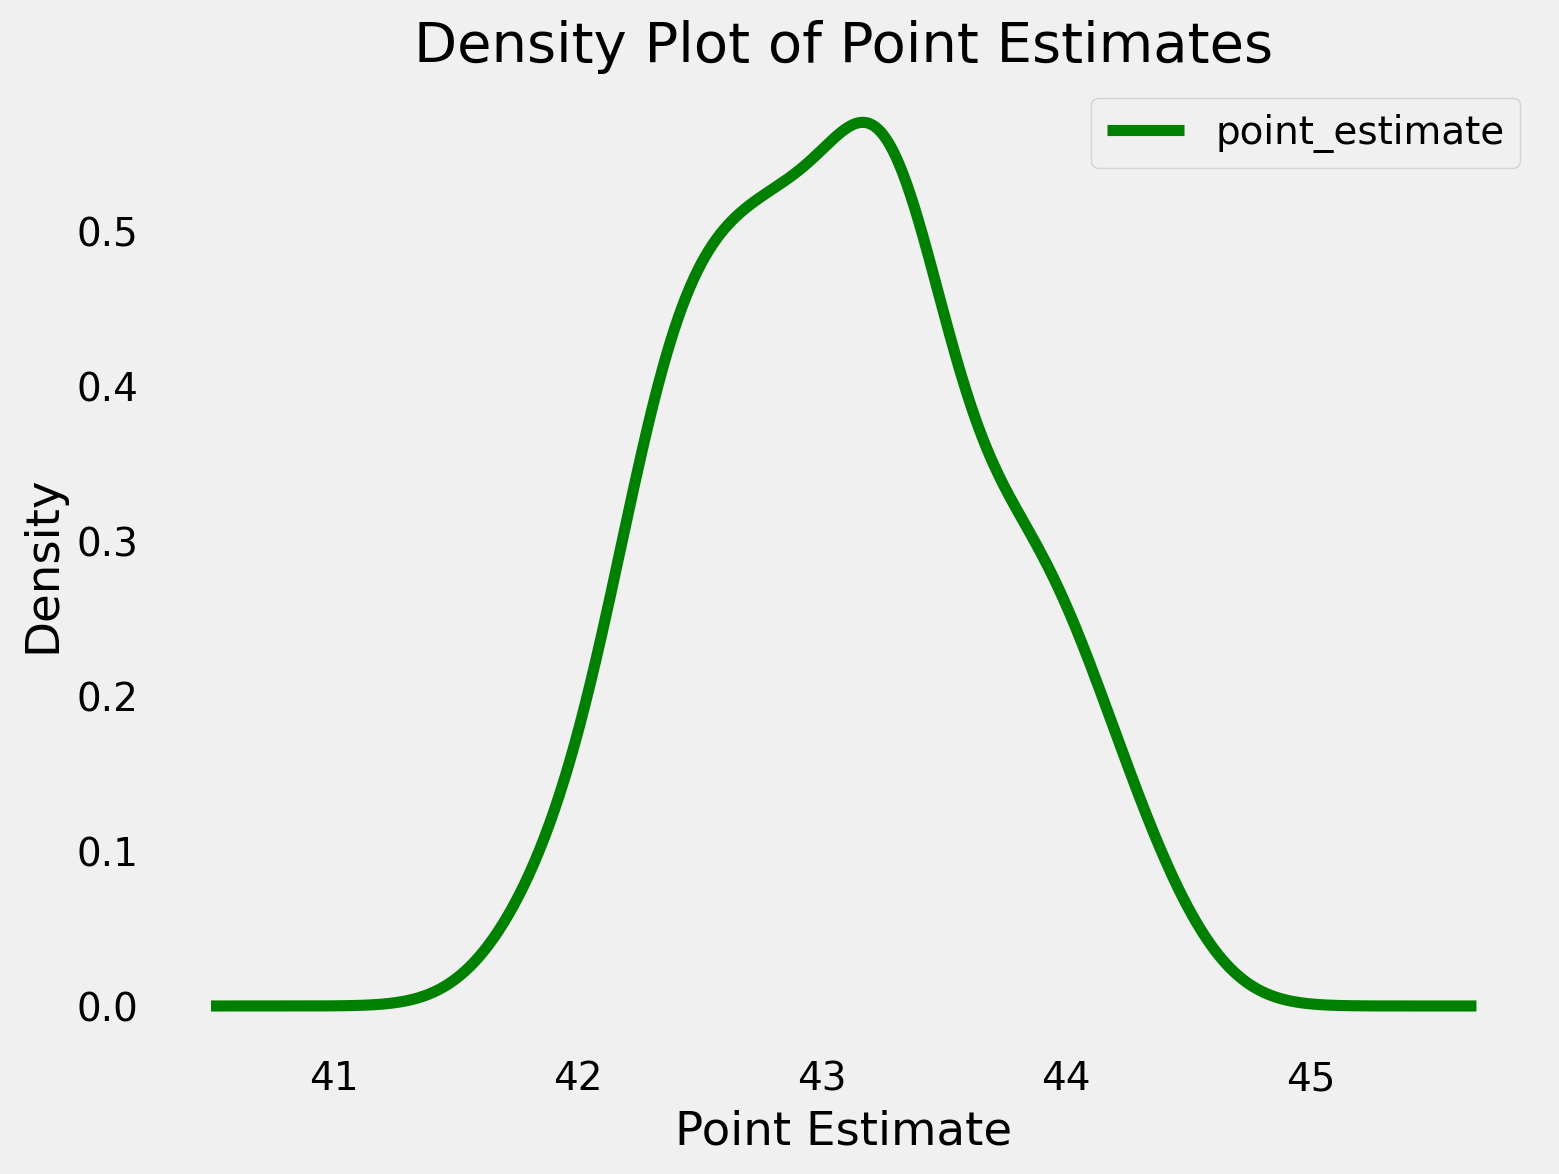

In [11]:
#Visualize the point estimates by plotting a density plot (use pandas)

point_estimates_df.plot(kind="density", figsize=(8,6),color="g")

plt.title('Density Plot of Point Estimates')
plt.xlabel('Point Estimate')
plt.ylabel('Density')

# Show the plot
plt.grid()
plt.show()

In [14]:
def conf_interval(pop, sample):
    '''
    Function input: population , sample 
    Function output: z-critical, Margin of error, Confidence interval
    '''
    sample_size = 500
    n = len(sample)
    x_hat = sample.mean()

    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.norm.ppf(q = 0.975) to get the desired z-critical value 
    # instead of q = 0.95 because the distribution has two tails.
    z = stats.norm.ppf(0.975)  #  z-critical value for 95% confidence

    #Calculate the population std from data
    pop_stdev = np.std(pop, ddof=0)

    # Calculate the margin of error using formula given above
    moe = z * (pop_stdev / np.sqrt(n))

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (x_hat-moe, x_hat + moe)
    
    return z, moe, conf

# Call above function with sample and population 
z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    
    
    

print("z-critical value:")              
print(z_critical)         
print ('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)



z-critical value:
1.959963984540054

Margin of error
1.158026699800684

Confidence interval:
(42.43197330019932, 44.74802669980069)


We can create several such confidence intervals and visualize them to get a better sense of what it means to "capture" the true mean.

Let's set a sample size of 1000 and take 25 samples to calculate the confidence intervals using the function above.

In [18]:
np.random.seed(12)

# Select the sample size 
sample_size = 1000

# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values

for sample in range(25):
    # Take a random sample of chosen size 
    sample = np.random.choice(population_ages, sample_size, replace=False)
    
    # Calculate z_critical, margin_of_error, confidence_interval from function above
    z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    

    sample_mean = sample.mean()
    
    # Calculate and append sample means and conf intervals for each iteration
    sample_means.append(sample_mean)
    intervals.append(conf_interval)

# Show sample means and confidence intervals
#print("Sample Means:\n", sample_means)
#print("\nConfidence Intervals:\n", intervals)